In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/kaggle/input/dslatam/dataset_SCL.csv") #load dataset
df.head() #show first 5 rows at table

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [2]:
df.shape

(68206, 18)

In [3]:
df.dtypes # show type of variables for every column

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [4]:
# Adjust variables for correct format
df['Fecha-I']=pd.to_datetime(df['Fecha-I'])
df['Fecha-O']=pd.to_datetime(df['Fecha-O']) 

#Check if object variable can be category
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} has {df[col].nunique()} different values")
    elif df[col].dtype == 'int64':
        print(f"{col} is int64 and max value is: {df[col].max()} and min value is: {df[col].min()}")
        

Vlo-I has 750 different values
Ori-I has 1 different values
Des-I has 64 different values
Emp-I has 30 different values
Vlo-O has 866 different values
Ori-O has 1 different values
Des-O has 63 different values
Emp-O has 32 different values
DIA is int64 and max value is: 31 and min value is: 1
MES is int64 and max value is: 12 and min value is: 1
AÑO is int64 and max value is: 2018 and min value is: 2017
DIANOM has 7 different values
TIPOVUELO has 2 different values
OPERA has 23 different values
SIGLAORI has 1 different values
SIGLADES has 62 different values


In [5]:
#Based on the data catalog and the information above we have a cut-off for categorical variables with less than 500 values 
#I am doing this because I believe that this is just a sample of a bigger dataset which can contain more destination and origin cities.
catcols=[]
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique()<200:
        df[col]=df[col].astype('category')
        catcols.append(col)
    elif df[col].dtype == 'int64' and df[col].max() < 127:
        df[col]=df[col].astype('int8')
    elif df[col].dtype == 'int64' and df[col].max() < 32767: 
        df[col]=df[col].astype('int16')
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I              category
Des-I              category
Emp-I              category
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O              category
Des-O              category
Emp-O              category
DIA                    int8
MES                    int8
AÑO                   int16
DIANOM             category
TIPOVUELO          category
OPERA              category
SIGLAORI           category
SIGLADES           category
dtype: object

In [6]:
#Considering that this is just a sample and assuming that the original dataset is a CSV file, the right thing to do is to add an argument on the read_csv function, dtypes={dict of every column with the value as the dtype}
#We could

In [7]:
%%time
#creating a function and dummy variables for month and day is a simple way to create the high_season feat
def high_season(x):
    month=x.month
    day=x.day
    if ((month == 12 and day >= 15) or
     (month in [1,2]) or 
     (month == 3 and day <= 3) or 
     (month == 7 and day >= 15 and day <= 31) or 
     (month == 9 and day >= 11 and day <= 30)): return True #the outer parentesis is to multiple line conditions
    else:
        return False
    
df['high_season']=df['Fecha-I'].apply(lambda x: high_season(x))
df.groupby([df['Fecha-I'].dt.month,'high_season'])['Fecha-O'].count().unstack()

     

CPU times: user 272 ms, sys: 10.1 ms, total: 283 ms
Wall time: 286 ms


high_season,False,True
Fecha-I,,
1,NaN,6108.0
2,NaN,5561.0
3,4903.0,577.0
4,5021.0,NaN
5,5239.0,NaN
6,4982.0,NaN
7,2701.0,3290.0
8,5744.0,NaN
9,1853.0,3757.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


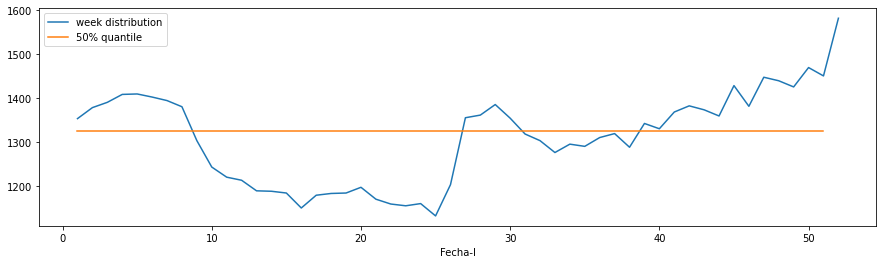

Weeks that should be the high_season (based on number of flights) 
[ 1  2  3  4  5  6  7  8 27 28 29 30 39 40 41 42 43 44 45 46 47 48 49 50
 51 52]

 instead of [ 1  2  3  4  5  6  7  8  9 28 29 30 31 37 38 39 50 51 52]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


high_season_2,False,True
high_season,,
False,28073,17371
True,3764,18998


In [8]:
week_dist=df.groupby(df['Fecha-I'].dt.week)['Fecha-O'].count()
week_dist.plot(figsize=(15,4)) #not using year because only has dates in 2017
q=week_dist.quantile(q=0.5)
plt.plot([1,51],[q,q])
plt.legend(['week distribution','50% quantile'])
plt.show()
#the graph below show us the quantity of flights by week in 2017, we can see that the high season variable 
print(f"""Weeks that should be the high_season (based on number of flights) \n{week_dist[week_dist>q].index.values}
\n instead of {df[df['high_season']==1]['Fecha-I'].dt.week.value_counts().index.sort_values().values}""")
df['high_season_2']=(df['Fecha-I'].dt.week.isin(week_dist[week_dist>q].index.values)).astype(bool)
# parallel high_season for this analysis
df.groupby(['high_season','high_season_2'])['Fecha-I'].count().unstack()

In [9]:
df['min_diff']=((df['Fecha-O']-df['Fecha-I']).dt.total_seconds()/60).astype("int16") #diff between dates in minutes
df['delay_15']=(df['min_diff']>15).astype(bool) #bool is lighter than intergers, using vectorization we can speed-up this step
df['period_day']=df['Fecha-I'].dt.hour.apply(lambda x: 'night' if x >= 19 or x<= 4 else (
                                            'morning' if x <= 12 else 'afternoon' )) # one alternative method: map()
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,high_season_2,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,True,True,3,False,night
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,True,True,9,False,night
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,True,True,9,False,night
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,True,True,3,False,night
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,True,True,-2,False,night


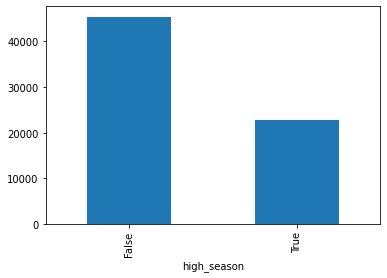

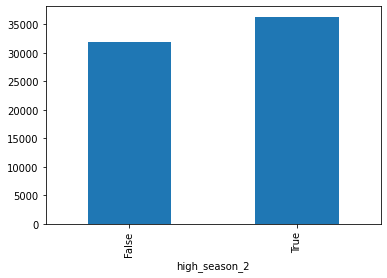

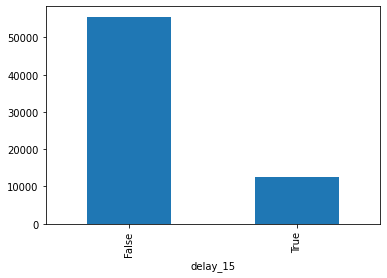

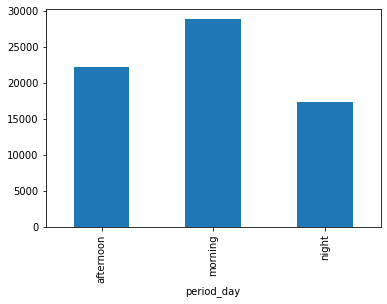

In [10]:
for var in ['high_season','high_season_2','delay_15','period_day']:
    df.groupby(var)['Fecha-I'].count().plot.bar()
    plt.show()
#We can see that the generated variables makes sense, in the next cell we are going to compare all of the variables with delay_15 to see if we can see a clear pattern in variables.

In [11]:
df.dtypes

Fecha-I          datetime64[ns]
Vlo-I                    object
Ori-I                  category
Des-I                  category
Emp-I                  category
Fecha-O          datetime64[ns]
Vlo-O                    object
Ori-O                  category
Des-O                  category
Emp-O                  category
DIA                        int8
MES                        int8
AÑO                       int16
DIANOM                 category
TIPOVUELO              category
OPERA                  category
SIGLAORI               category
SIGLADES               category
high_season                bool
high_season_2              bool
min_diff                  int16
delay_15                   bool
period_day               object
dtype: object

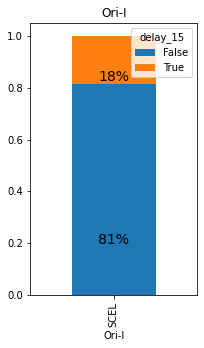

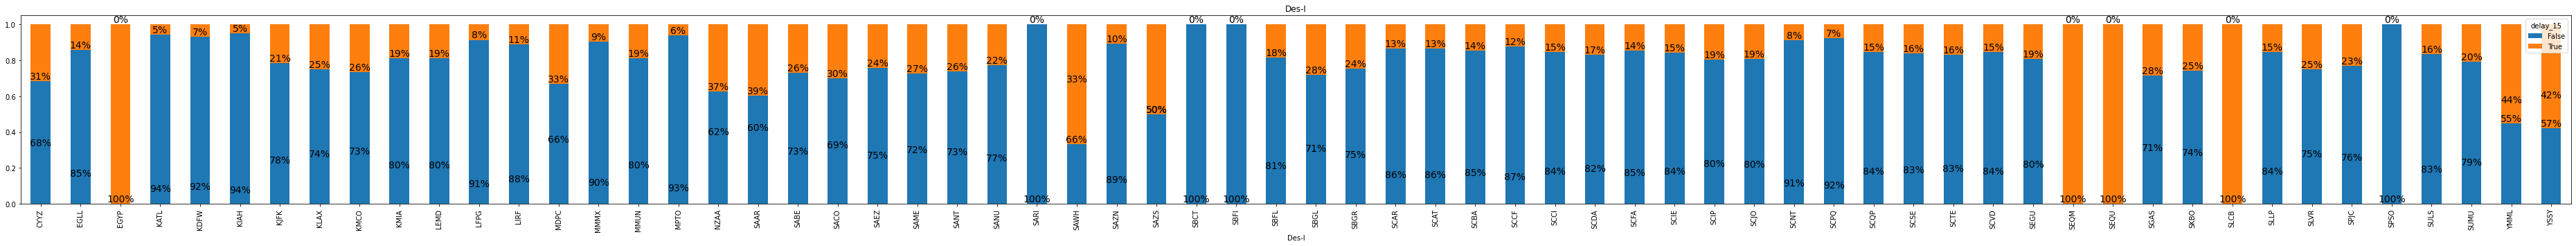

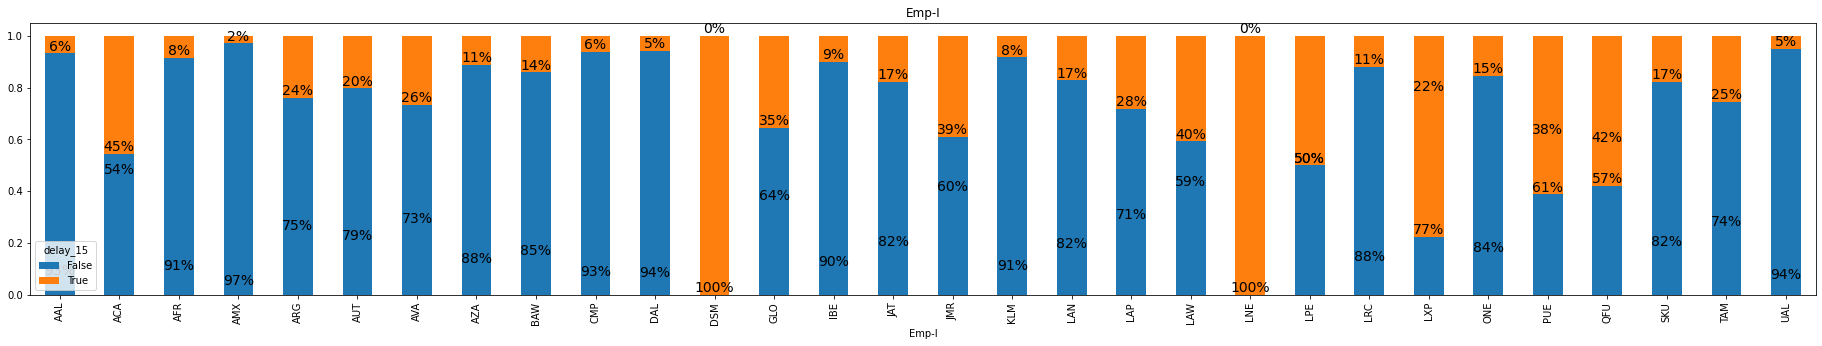

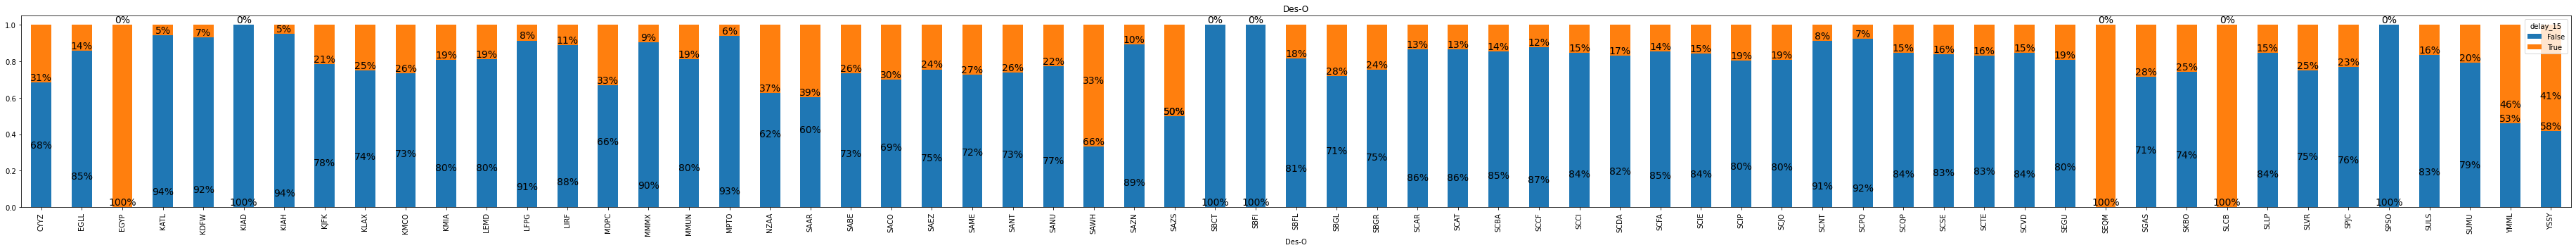

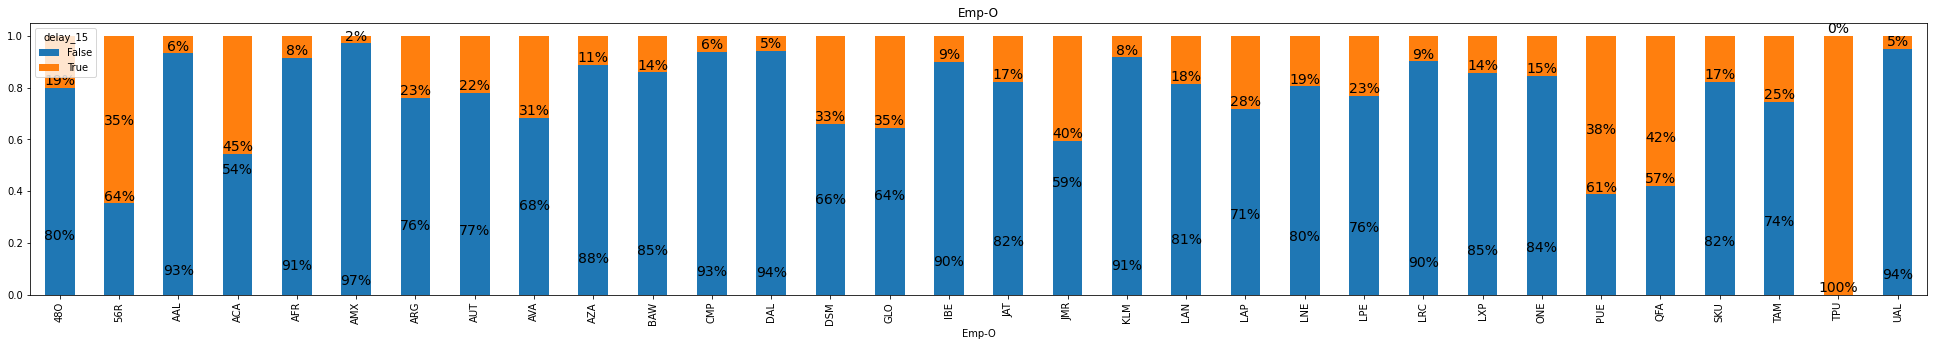

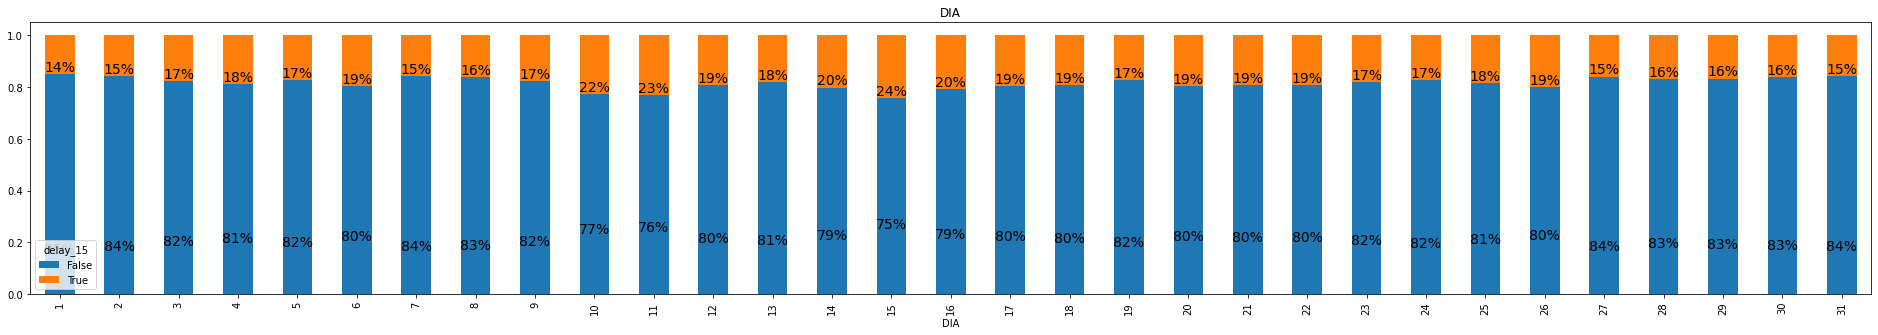

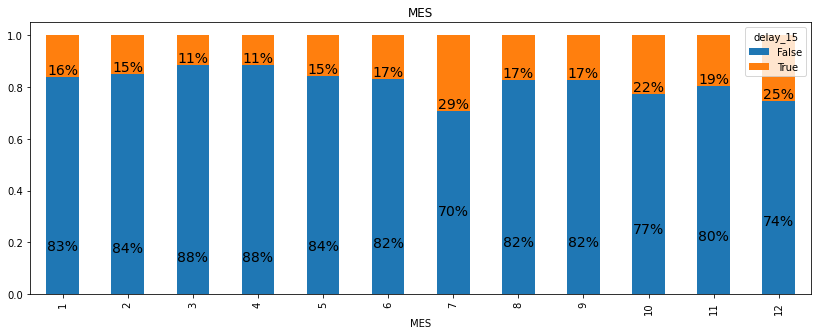

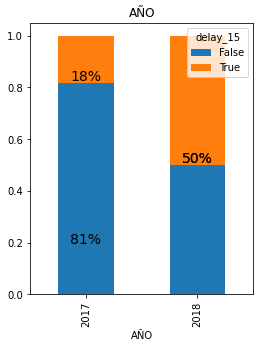

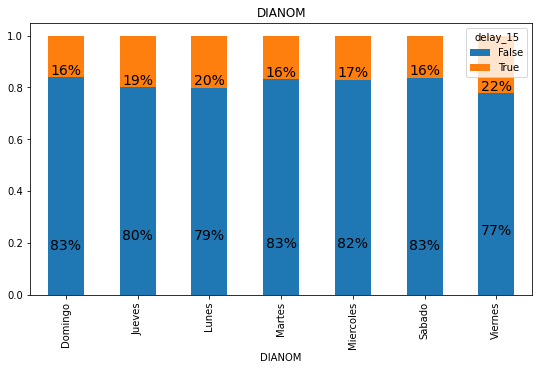

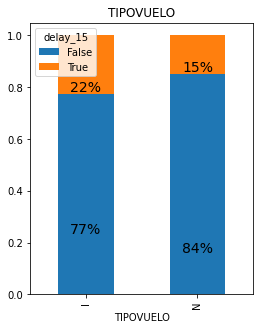

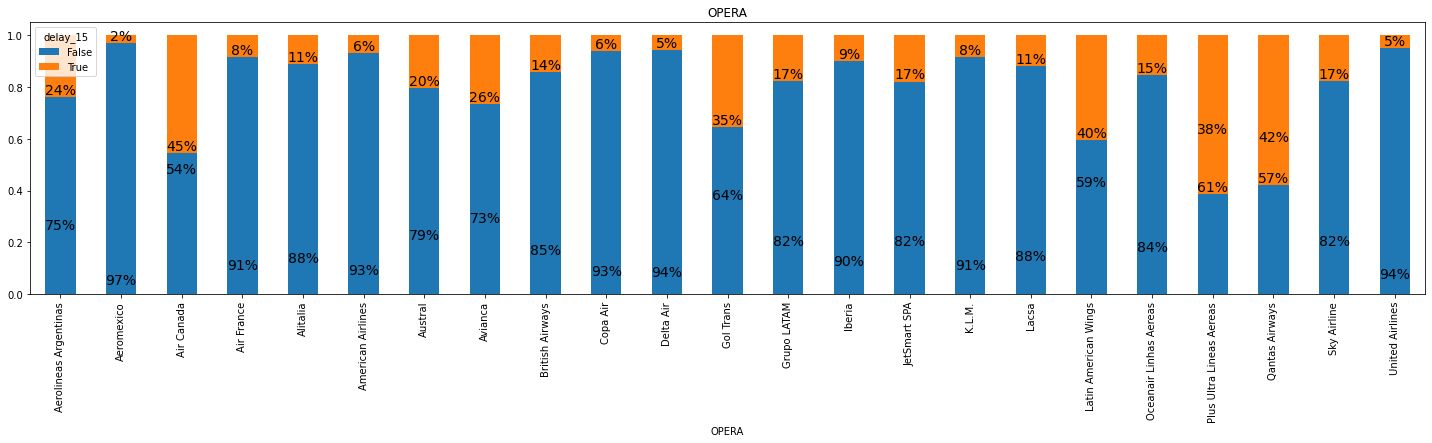

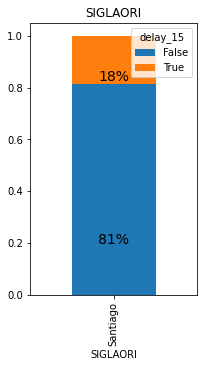

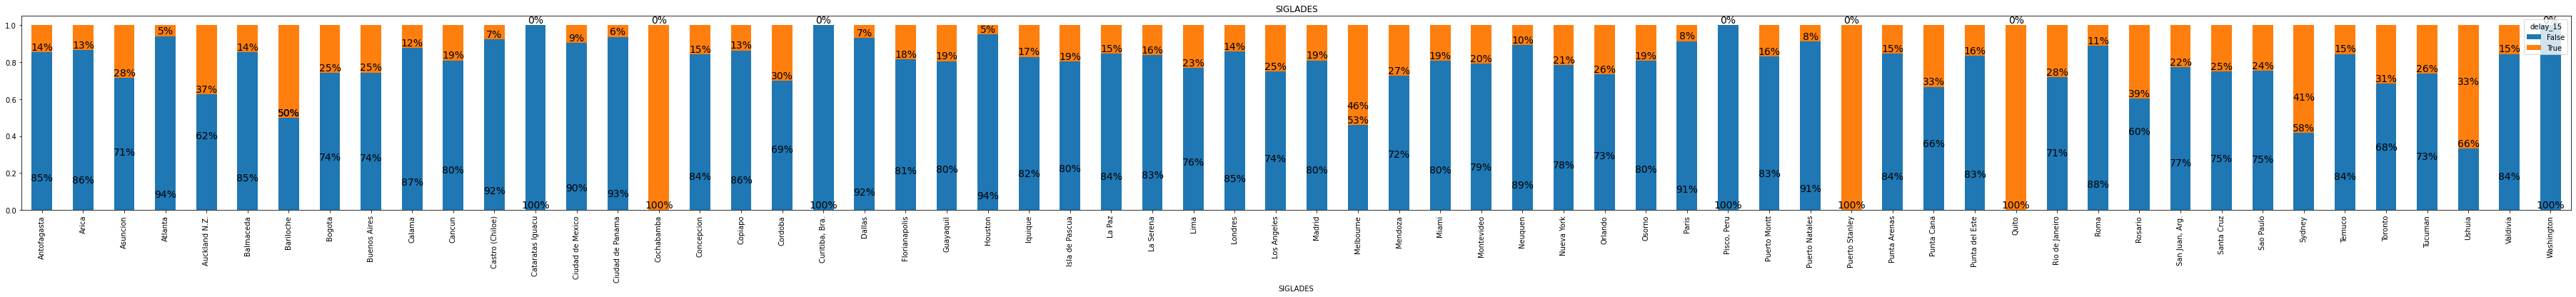

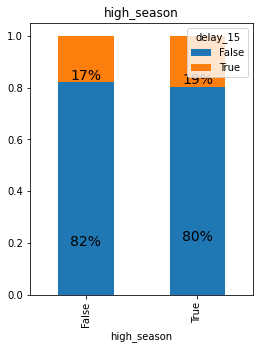

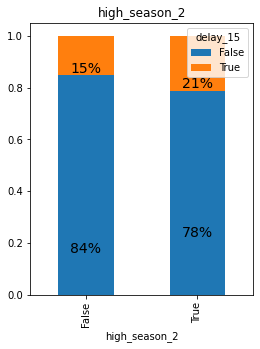

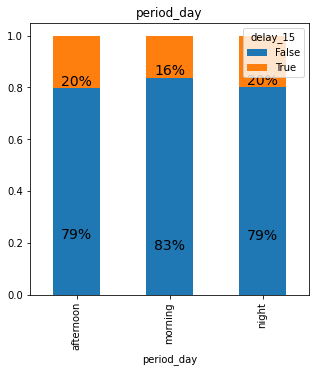

In [12]:
#First challenge - how is the data distributed?

for var in df.columns:
    if var not in ['Fecha-I','Fecha-O','Vlo-I','Vlo-O','Ori-O','Ori-','delay_15','min_diff']:
        dif_clases=df[var].nunique()
        ax=(df.groupby([var,'delay_15'])['Fecha-I'].count()/df.groupby([var])['Fecha-I'].count()).unstack().plot.bar(stacked=True,figsize=((int((dif_clases+4/2)),5)))
        for p in ax.patches:
            height = p.get_height()
            if np.isnan(height):
                height = 0
            ax.text(p.get_x() + p.get_width()/2., height, f'{int((1-height)*100)}%', 
                fontsize=14, color='black', ha='center', va='bottom')
        plt.title(var)
        plt.show()

In [13]:
# Considerations for alone distribution of variables 

# 